## PANDAS - parte II

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
pd.__version__

'0.20.3'

In [3]:
df = pd.read_csv('brasileirao.csv')

df.drop(['TIMES.1', 'idx', '%'], axis = 1, inplace = True)

UF_dict = {'Atlético-GO': 'GO',
 'Atlético-MG': 'MG',
 'Atlético-PR': 'PR',
 'Avaí': 'SC',
 'Bahia': 'BA',
 'Botafogo': 'RJ',
 'Chapecoense': 'SC',
 'Corinthians': 'SP',
 'Coritiba': 'PR',
 'Cruzeiro': 'MG',
 'Flamengo': 'RJ',
 'Fluminense': 'RJ',
 'Grêmio': 'RS',
 'Palmeiras': 'SP',
 'Ponte Preta': 'SP',
 'Santos': 'SP',
 'Sport': 'PE',
 'São Paulo': 'SP',
 'Vasco da Gama': 'RJ',
 'Vitória': 'ES'}

df['UF'] = df.TIMES.map(UF_dict)
df.set_index('TIMES', inplace = True)

#### value_counts()

In [4]:
df.UF.value_counts()

SP    5
RJ    4
MG    2
SC    2
PR    2
PE    1
BA    1
GO    1
ES    1
RS    1
Name: UF, dtype: int64

## *Estatísticas para analise univariada:*

### Para uma variável $X$ com $n$ amostras $x_1, x_2,..., x_n$

 * ### Média

### $\overline{x}_n = \frac{1}{n} \sum_{i=1}^n x_i $

* ### Desvio padrão ($\sigma$) e variancia ($\sigma^2$)

### $\sigma = \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x}_n)^2 }$

* ### Mediana

valor que valor numérico que separa a metade superior de uma amostra de dados ordenada, da metade inferior
<br>


## *Estatísticas para analise bivariada:*

* ### Covariancia

### $cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n-1}$

* ### Correlação (Pearson's r)

### $r = \frac{cov_{x,y}}{\sigma_x \sigma_y} = \frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}
{ \sqrt{ \sum_{i=1}^n (x_i - \overline{x}_n)^2 }
  \sqrt{ \sum_{i=1}^n (y_i - \overline{y}_n)^2 } }$


#### correlação entre duas variaveis

In [5]:
import seaborn as sns

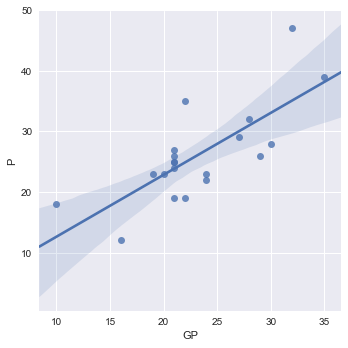

In [6]:
sns.lmplot(data = df, x = 'GP', y = 'P')

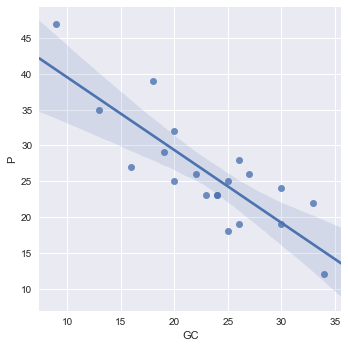

In [7]:
sns.lmplot(data = df, x = 'GC', y = 'P')

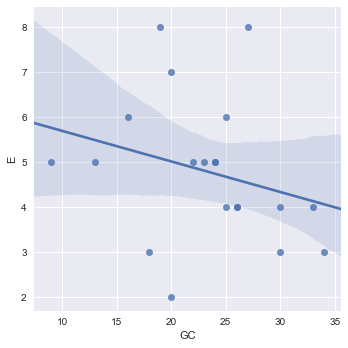

In [8]:
sns.lmplot(x = 'GC', y = 'E', data = df)

In [9]:
df[['P', 'GP', 'GC']].corr()

,P,GP,GC
P,1.000000,0.751539,-0.830564
GP,0.751539,1.000000,-0.392264
GC,-0.830564,-0.392264,1.000000


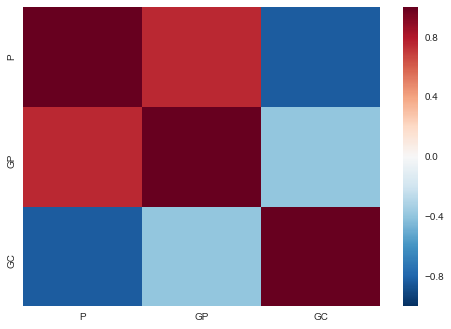

In [10]:
sns.heatmap(_)

#### Explorando ativos do Ibovespa
... infelizmente pandas_datareader ainda não funciona com pandas 0.20

In [11]:
# import pandas as pd
# import pandas_datareader as web 
# import datetime
# import matplotlib.pyplot as plt
# %matplotlib inline
 
# start = datetime.datetime(2016,1,1)
# end = datetime.datetime(2016,12,31)

In [12]:
# ibov = web.DataReader("^BVSP", "yahoo", start, end)
# petr = web.DataReader("PETR4.SA", "yahoo", start, end)
# vale = web.DataReader("VALE5.SA", "yahoo", start, end)

# bz = web.DataReader('DEXBZUS', 'fred', start, end)

#### imputando valores com fillna()

In [13]:
df['subiu_desceu'] = df.subiu_desceu.fillna('Igual')

In [14]:
# tirar o ultimo digito da coluna se houver
df['subiu_desceu'] = [s[:-1] if s is not 'Igual' else 'Igual' for s in df.subiu_desceu]

#### empilhando o dataframe com stack()
tambem conhecido como formato narrow

In [15]:
df.stack()

TIMES                    
Corinthians  subiu_desceu     Igual
             P                   47
             J                   19
             V                   14
             E                    5
             D                    0
             GP                  32
             GC                   9
             SG                  23
             UF                  SP
Grêmio       subiu_desceu     Igual
             P                   39
             J                   19
             V                   12
             E                    3
             D                    4
             GP                  35
             GC                  18
             SG                  17
             UF                  RS
Santos       subiu_desceu     Igual
             P                   35
             J                   19
             V                   10
             E                    5
             D                    4
             GP                  22
  

#### removendo duplicidades

In [16]:
df = pd.concat([df.sample(3), df])

In [17]:
# a função duplicated() fornece um array de booleanos, com True sendo a linha repetida
df = df[~df.index.duplicated(keep = 'first')]

In [18]:
df = df.sort_values('P', ascending = False)

In [19]:
df

,subiu_desceu,P,J,V,E,D,GP,GC,SG,UF
TIMES,,,,,,,,,,
Corinthians,Igual,47,19,14,5,0,32,9,23,SP
Grêmio,Igual,39,19,12,3,4,35,18,17,RS
Santos,Igual,35,19,10,5,4,22,13,9,SP
Palmeiras,Igual,32,19,10,2,7,28,20,8,SP
Flamengo,Igual,29,19,7,8,4,27,19,8,RJ
Sport,Igual,28,19,8,4,7,30,26,4,PE
Cruzeiro,Igual,27,19,7,6,6,21,16,5,MG
Atlético-PR,Subiu,26,19,7,5,7,21,22,-1,PR
Fluminense,Subiu,26,19,6,8,5,29,27,2,RJ


#### transformando variaveis numericas em categóricas

In [20]:
df['situacao'] = pd.cut(df.P, [0, 20, 30, 50], 
                        labels = ['Rebaixamento', '-', 'Libertadores'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Corinthians to Atlético-GO
Data columns (total 11 columns):
subiu_desceu    20 non-null object
P               20 non-null int64
J               20 non-null int64
V               20 non-null int64
E               20 non-null int64
D               20 non-null int64
GP              20 non-null int64
GC              20 non-null int64
SG              20 non-null int64
UF              20 non-null object
situacao        20 non-null category
dtypes: category(1), int64(8), object(2)
memory usage: 1.8+ KB


In [24]:
df.situacao.describe()

count     20
unique     3
top        -
freq      12
Name: situacao, dtype: object

#### get_dummies()
transforma valores distintos numa determinada coluna, em varias colunas, uma para cada valor distinto.<br>
tambem conhecido com OHE - one hot encoding

In [72]:
pd.get_dummies(df.subiu_desceu, 'subiu_desceu')

,subiu_desceu_Desceu,subiu_desceu_Igual,subiu_desceu_Subiu
TIMES,,,
Corinthians,0,1,0
Grêmio,0,1,0
Santos,0,1,0
Palmeiras,0,1,0
Flamengo,0,1,0
Sport,0,1,0
Cruzeiro,0,1,0
Atlético-PR,0,0,1
Fluminense,0,0,1


### Group-by
utilizado para agrupar segundo valores comuns de coluna(s)

In [28]:
df_agrupado = df.groupby('UF')

In [36]:
for key, parte_do_df in df_agrupado:
    print(key)
    print(parte_do_df)
    print('-' * 30)

BA
      subiu_desceu   P   J  V  E  D  GP  GC  SG  UF situacao
TIMES                                                       
Bahia        Subiu  23  19  6  5  8  24  24   0  BA        -
------------------------------
ES
        subiu_desceu   P   J  V  E   D  GP  GC  SG  UF      situacao
TIMES                                                               
Vitória        Subiu  19  19  5  4  10  21  30  -9  ES  Rebaixamento
------------------------------
GO
            subiu_desceu   P   J  V  E   D  GP  GC  SG  UF      situacao
TIMES                                                                   
Atlético-GO        Igual  12  19  3  3  13  16  34 -18  GO  Rebaixamento
------------------------------
MG
            subiu_desceu   P   J  V  E  D  GP  GC  SG  UF situacao
TIMES                                                             
Cruzeiro           Igual  27  19  7  6  6  21  16   5  MG        -
Atlético-MG       Desceu  23  19  6  5  8  19  23  -4  MG        -
------------------

In [39]:
df_agrupado.P.mean().sort_values(ascending = False)

UF
RS    39.0
SP    31.2
PE    28.0
RJ    26.0
PR    25.5
MG    25.0
BA    23.0
SC    20.0
ES    19.0
GO    12.0
Name: P, dtype: float64

In [40]:
df_agrupado.P.std()

UF
BA          NaN
ES          NaN
GO          NaN
MG     2.828427
PE          NaN
PR     0.707107
RJ     2.160247
RS          NaN
SC     2.828427
SP    10.963576
Name: P, dtype: float64

In [45]:
import numpy as np

#### agg()

In [47]:
# alternativa a chamar os metodos, é chamar a função dentro do agg()
df_agrupado.P.agg('mean')

UF
BA    23.0
ES    19.0
GO    12.0
MG    25.0
PE    28.0
PR    25.5
RJ    26.0
RS    39.0
SC    20.0
SP    31.2
Name: P, dtype: float64

In [48]:
df_agrupado.P.agg(['mean', 'std'])

,mean,std
UF,,
BA,23.0,NaN
ES,19.0,NaN
GO,12.0,NaN
MG,25.0,2.828427
PE,28.0,NaN
PR,25.5,0.707107
RJ,26.0,2.160247
RS,39.0,NaN
SC,20.0,2.828427


In [49]:
# pode definir uma função e chama-la
def max_min(arr):
    return arr.max() - arr.min()

In [51]:
df_agrupado.P.agg(max_min)

UF
BA     0
ES     0
GO     0
MG     4
PE     0
PR     1
RJ     5
RS     0
SC     4
SP    28
Name: P, dtype: int64

In [52]:
df_agrupado.P.agg(['mean', max_min])

,mean,max_min
UF,,
BA,23.0,0
ES,19.0,0
GO,12.0,0
MG,25.0,4
PE,28.0,0
PR,25.5,1
RJ,26.0,5
RS,39.0,0
SC,20.0,4


In [54]:
df_agrupado.agg({'P': ['mean', 'std'], 'GP': ['mean', 'std']})

GP               P           
    mean       std  mean        std
UF                                 
BA  24.0       NaN  23.0        NaN
ES  21.0       NaN  19.0        NaN
GO  16.0       NaN  12.0        NaN
MG  20.0  1.414214  25.0   2.828427
PE  30.0       NaN  28.0        NaN
PR  21.0  0.000000  25.5   0.707107
RJ  24.5  4.123106  26.0   2.160247
RS  35.0       NaN  39.0        NaN
SC  17.0  9.899495  20.0   2.828427
SP  24.8  5.019960  31.2  10.963576

#### apply()

In [61]:
df_agrupado[['P','GP']].apply(np.mean)

,P,GP
UF,,
BA,23.0,24.0
ES,19.0,21.0
GO,12.0,16.0
MG,25.0,20.0
PE,28.0,30.0
PR,25.5,21.0
RJ,26.0,24.5
RS,39.0,35.0
SC,20.0,17.0


#### transform()

In [66]:
df['ranking_na_UF'] = df_agrupado.P.transform(lambda x: range(1, len(x) + 1))

In [67]:
df

,subiu_desceu,P,J,V,E,D,GP,GC,SG,UF,situacao,ranking_na_UF
TIMES,,,,,,,,,,,,
Corinthians,Igual,47,19,14,5,0,32,9,23,SP,Libertadores,1
Grêmio,Igual,39,19,12,3,4,35,18,17,RS,Libertadores,1
Santos,Igual,35,19,10,5,4,22,13,9,SP,Libertadores,2
Palmeiras,Igual,32,19,10,2,7,28,20,8,SP,Libertadores,3
Flamengo,Igual,29,19,7,8,4,27,19,8,RJ,-,1
Sport,Igual,28,19,8,4,7,30,26,4,PE,-,1
Cruzeiro,Igual,27,19,7,6,6,21,16,5,MG,-,1
Atlético-PR,Subiu,26,19,7,5,7,21,22,-1,PR,-,1
Fluminense,Subiu,26,19,6,8,5,29,27,2,RJ,-,2
